In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "MLP.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "MLP.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "MLP.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "MLP.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "MLP.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "MLP.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run MLP model
    MLP = MLPClassifier(random_state=1, max_iter=300)
    MLP.fit(X_train,y_train)
    y_predicts = MLP.predict(X_test)
    y_pred_probs = MLP.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = MLP.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.6595678578206161, 'accuracy': 0.9041666666666667, 'fairness': 0.23670063968387478, 'Positive_prot_pred': 0.7371134020618557, 'Positive_non_prot_pred': 0.9738140417457305, 'Negative_prot_pred': 0.26288659793814434, 'Negative_non_prot_pred': 0.026185958254269448}
Equal opportunity
{'balanced_accuracy': 0.6595678578206161, 'accuracy': 0.9041666666666667, 'fairness': 0.12365985675789026, 'TPR_protected': 0.8635724331926864, 'TPR_non_protected': 0.9872322899505767, 'TNR_protected': 0.61003861003861, 'TNR_non_protected': 0.18357487922705315}
Equalized odds
{'balanced_accuracy': 0.6595678578206161, 'accuracy': 0.9041666666666667, 'fairness': 0.5501235875694471, 'TPR_protected': 0.8635724331926864, 'TPR_non_protected': 0.9872322899505767, 'TNR_protected': 0.61003861003861, 'TNR_non_protected': 0.18357487922705315}
Predictive parity
{'balanced_accuracy': 0.6595678578206161, 'accuracy': 0.9041666666666667, 'fairness': 0.07539747859311385, 'TPR_protecte

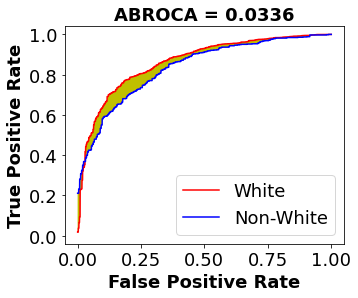

ABROCA: 0.03361347461103818


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.5732033762057878, 'accuracy': 0.6526418786692759, 'fairness': -0.07707042728362845, 'Positive_prot_pred': 0.9193857965451055, 'Positive_non_prot_pred': 0.8423153692614771, 'Negative_prot_pred': 0.08061420345489444, 'Negative_non_prot_pred': 0.15768463073852296}
Equal opportunity
{'balanced_accuracy': 0.5732033762057878, 'accuracy': 0.6526418786692759, 'fairness': 0.033045571077277236, 'TPR_protected': 0.9536231884057971, 'TPR_non_protected': 0.9205776173285198, 'TNR_protected': 0.14772727272727273, 'TNR_non_protected': 0.2544642857142857}
Equalized odds
{'balanced_accuracy': 0.5732033762057878, 'accuracy': 0.6526418786692759, 'fairness': 0.1397825840642902, 'TPR_protected': 0.9536231884057971, 'TPR_non_protected': 0.9205776173285198, 'TNR_protected': 0.14772727272727273, 'TNR_non_protected': 0.2544642857142857}
Predictive parity
{'balanced_accuracy': 0.5732033762057878, 'accuracy': 0.6526418786692759, 'fairness': 0.08258219632132502, 'TPR_pro

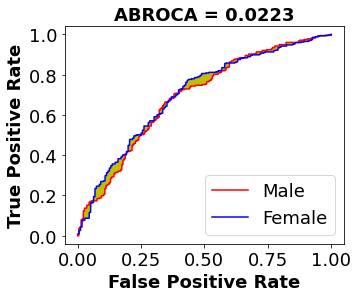

ABROCA: 0.022287332453306375


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': -0.1328320802005013, 'Positive_prot_pred': 0.8947368421052632, 'Positive_non_prot_pred': 0.7619047619047619, 'Negative_prot_pred': 0.10526315789473684, 'Negative_non_prot_pred': 0.23809523809523808}
Equal opportunity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.21052631578947367, 'TPR_protected': 1.0, 'TPR_non_protected': 0.7894736842105263, 'TNR_protected': 1.0, 'TNR_non_protected': 0.5}
Equalized odds
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.7105263157894737, 'TPR_protected': 1.0, 'TPR_non_protected': 0.7894736842105263, 'TNR_protected': 1.0, 'TNR_non_protected': 0.5}
Predictive parity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.0625, 'TPR_protected': 1.0, 'TPR_non_protected': 0.7894736842105263, 'TNR_protected': 1.0, 'TNR_non_protected': 0.5}
Predictive equality
{'balanced_accuracy': 0.819444444444

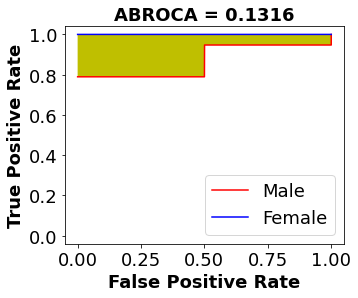

ABROCA: 0.13157894736842762


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.9251042287075639, 'accuracy': 0.9327731092436975, 'fairness': 0.18682871678914648, 'Positive_prot_pred': 0.5344827586206896, 'Positive_non_prot_pred': 0.7213114754098361, 'Negative_prot_pred': 0.46551724137931033, 'Negative_non_prot_pred': 0.2786885245901639}
Equal opportunity
{'balanced_accuracy': 0.9251042287075639, 'accuracy': 0.9327731092436975, 'fairness': 0.04070660522273428, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9259259259259259, 'TNR_non_protected': 0.8421052631578947}
Equalized odds
{'balanced_accuracy': 0.9251042287075639, 'accuracy': 0.9327731092436975, 'fairness': 0.12452726799076552, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9259259259259259, 'TNR_non_protected': 0.8421052631578947}
Predictive parity
{'balanced_accuracy': 0.9251042287075639, 'accuracy': 0.9327731092436975, 'fairness': 0.003665689149560114, 'TPR_protec

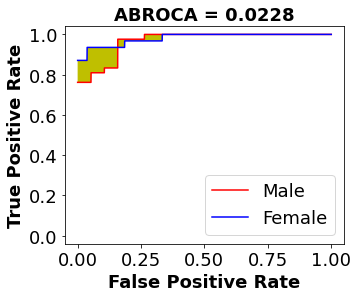

ABROCA: 0.022762890343473542


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.7840236686390533, 'accuracy': 0.9076923076923077, 'fairness': -0.0629886084431539, 'Positive_prot_pred': 0.9008264462809917, 'Positive_non_prot_pred': 0.8378378378378378, 'Negative_prot_pred': 0.09917355371900827, 'Negative_non_prot_pred': 0.16216216216216217}
Equal opportunity
{'balanced_accuracy': 0.7840236686390533, 'accuracy': 0.9076923076923077, 'fairness': 0.02996941896024463, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.9333333333333333, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.5714285714285714}
Equalized odds
{'balanced_accuracy': 0.7840236686390533, 'accuracy': 0.9076923076923077, 'fairness': 0.12520751419833986, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.9333333333333333, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.5714285714285714}
Predictive parity
{'balanced_accuracy': 0.7840236686390533, 'accuracy': 0.9076923076923077, 'fairness': 0.0600769458419651, 'TPR_protected

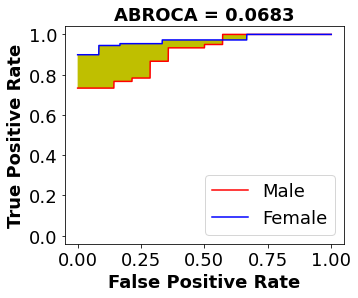

ABROCA: 0.06826524060562875


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.8545454545454545, 'accuracy': 0.875, 'fairness': -0.2112305330116253, 'Positive_prot_pred': 0.8297872340425532, 'Positive_non_prot_pred': 0.6185567010309279, 'Negative_prot_pred': 0.1702127659574468, 'Negative_non_prot_pred': 0.38144329896907214}
Equal opportunity
{'balanced_accuracy': 0.8545454545454545, 'accuracy': 0.875, 'fairness': 0.06538461538461537, 'TPR_protected': 0.9487179487179487, 'TPR_non_protected': 0.8833333333333333, 'TNR_protected': 0.75, 'TNR_non_protected': 0.8108108108108109}
Equalized odds
{'balanced_accuracy': 0.8545454545454545, 'accuracy': 0.875, 'fairness': 0.12619542619542623, 'TPR_protected': 0.9487179487179487, 'TPR_non_protected': 0.8833333333333333, 'TNR_protected': 0.75, 'TNR_non_protected': 0.8108108108108109}
Predictive parity
{'balanced_accuracy': 0.8545454545454545, 'accuracy': 0.875, 'fairness': 0.06538461538461537, 'TPR_protected': 0.9487179487179487, 'TPR_non_protected': 0.8833333333333333, 'TNR_protected

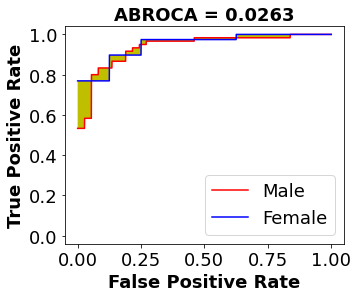

ABROCA: 0.026295402079069434


In [15]:
run_eval('xAPI-Edu')